In [1]:
import pandas as pd
import numpy as np
import visuals as vs
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

#高分辨率显示
%config InlineBackend.figure_format='retina'

low_fq    = pd.read_csv('D:/数据需求/关系/20201125/聚类需求/低频次用户.csv',encoding='gb18030')
high_fq   = pd.read_csv('D:/数据需求/关系/20201125/聚类需求/高频次用户.csv',encoding='gb18030')
new_user  = pd.read_csv('D:/数据需求/关系/20201125/聚类需求/新户用户.csv',encoding='gb18030')
cb_user   = pd.read_csv('D:/数据需求/关系/20201125/聚类需求/回流用户.csv',encoding='gb18030')

In [2]:
data = pd.read_csv('D:/数据需求/关系/20201125/聚类需求/低频表.csv',encoding='gb18030')
data

,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.uid,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.fpv,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.redianpv,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.pupv,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.remenpv,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.chpv,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.f,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.redian,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.pu,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.remen,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.ch,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.lei,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.actv_freq,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.actv_days
0,7235885773,10,0,0,8,0,0.555556,0.000000,0.000000,0.444444,0.000000,feed,低频次,9
1,7235885919,1,2,2,1,0,0.166667,0.333333,0.333333,0.166667,0.000000,其他,低频次,1
2,7235886985,11,15,17,6,1,0.220000,0.300000,0.340000,0.120000,0.020000,其他,低频次,8
3,7235888288,2,0,0,1,0,0.666667,0.000000,0.000000,0.333333,0.000000,feed,低频次,1
4,7235890157,60,116,67,1,4,0.241935,0.467742,0.270161,0.004032,0.016129,其他,低频次,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,7275540085,18,0,41,6,0,0.276923,0.000000,0.630769,0.092308,0.000000,普搜,低频次,9
39996,7275540140,0,0,0,7,0,0.000000,0.000000,0.000000,1.000000,0.000000,热门,低频次,7
39997,7275540438,2,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,feed,低频次,3
39998,7275540443,1,0,3,2,0,0.166667,0.000000,0.500000,0.333333,0.000000,普搜,低频次,1


In [3]:
data.drop(columns=['shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.uid','shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.fpv',
                  'shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.redianpv',
                  'shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.pupv',
                  'shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.remenpv',
                  'shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.chpv',
                  'shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.lei',
                  'shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.actv_freq',
                  'shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.actv_days'],inplace=True)

In [4]:
# 显示数据集的一个描述
display(data.describe())

,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.f,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.redian,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.pu,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.remen,shanshan45_julei_202010_liu_zs_mau_fenbu_lei_pinci.ch
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.423243,0.047867,0.120975,0.379437,0.028478
std,0.286468,0.131869,0.203594,0.309606,0.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205128,0.000000,0.000000,0.102564,0.000000
50%,0.409091,0.000000,0.000000,0.333333,0.000000
75%,0.600000,0.000000,0.181818,0.565217,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.columns = ['f','redian','pu','remen','ch']

In [6]:
import random
indices = random.sample(list(data.index), 1)
#indices = [40815]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of the dataset:")
display(samples)

Chosen samples of the dataset:


,f,redian,pu,remen,ch
0,0.25,0.0,0.0,0.75,0.0


In [7]:
# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一个特征# TODO： 
label = data['pu']
new_data = data.drop('pu',axis=1)

# TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, label, test_size = 0.2, random_state=0)

# TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
# TODO：输出在测试集上的预测得分
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
score = r2_score(y_test,y_pred)
print(score)

0.9894507216606753


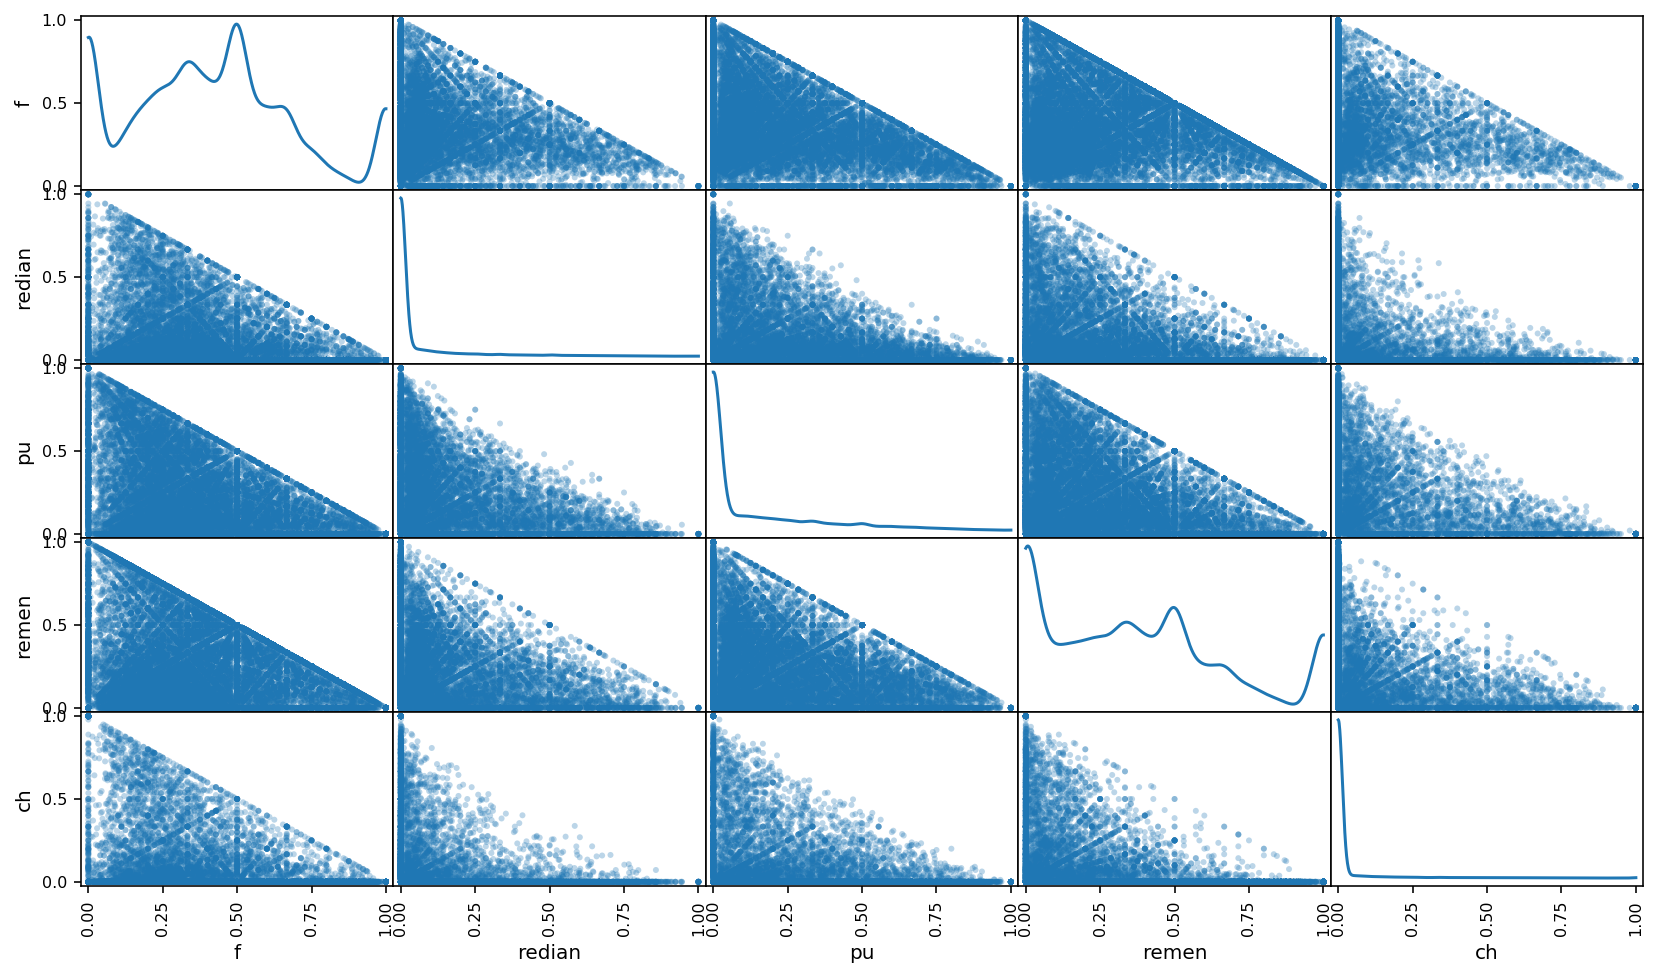

In [8]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

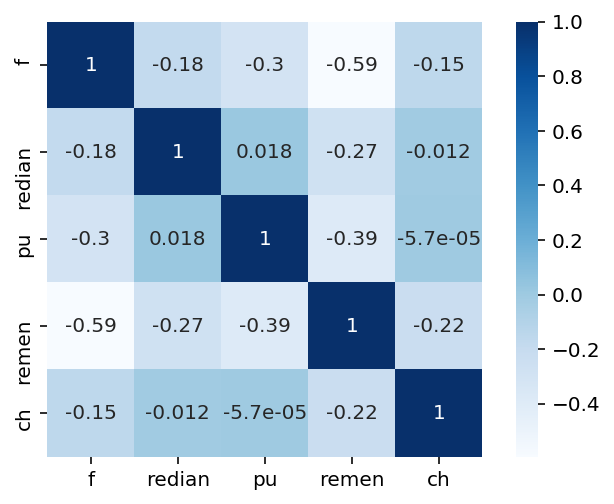

In [9]:
df = data.corr()
import seaborn as sb
sb.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")

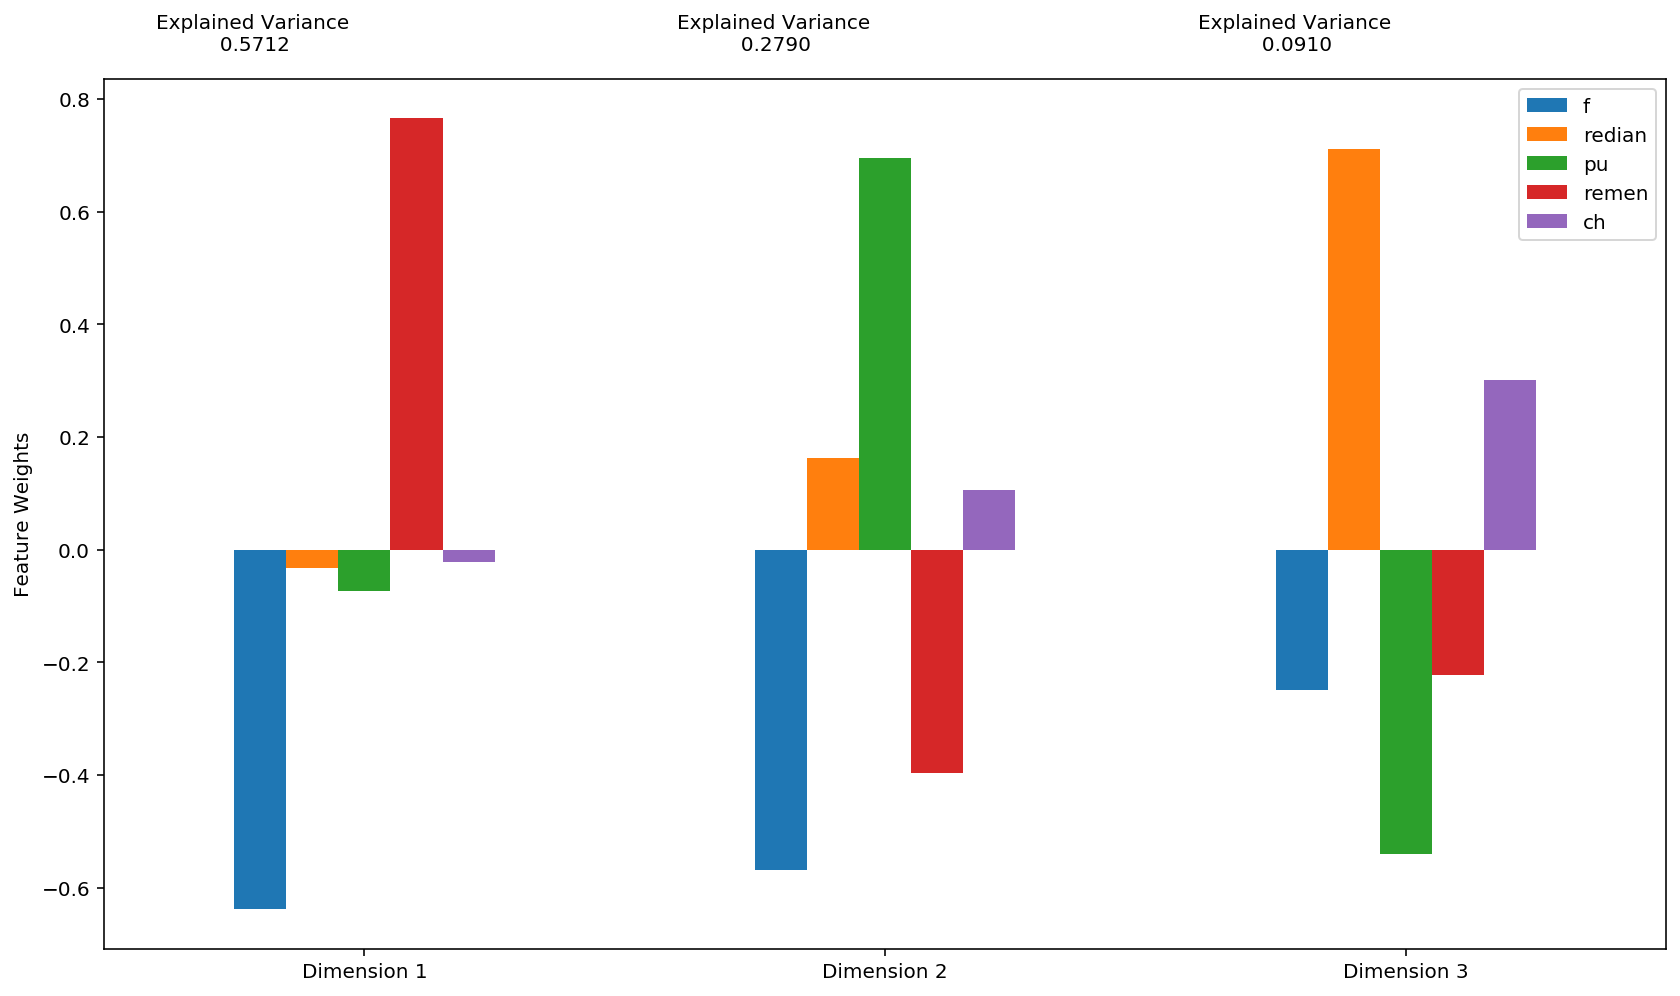

In [10]:
# TODO：通过在good data上进行PCA，将其转换成6个维度
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data)
# TODO：使用上面的PCA拟合将变换施加在log_samples上
pca_samples = pca.transform(samples)

# 生成PCA的结果图
pca_results = vs.pca_results(data, pca)

In [11]:
first_two = pca_results.iloc[0:2,[0]].sum()
print(first_two)

Explained Variance    0.8502
dtype: float64


In [12]:
first_four = pca_results.iloc[0:4,[0]].sum()
print(first_four)

Explained Variance    0.9412
dtype: float64


In [13]:
# 展示经过PCA转换的sample log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3
0,0.4053,-0.1432,-0.0162


In [14]:
# TODO：通过在data上进行PCA，将其转换成三个维度

pca = PCA(n_components=2)
pca.fit(data)
# TODO：使用上面训练的PCA将data进行转换
reduced_data = pca.transform(data)

# TODO：使用上面训练的PCA将log_samples进行转换
pca_samples = pca.transform(samples)

# 为降维后的数据创建一个DataFrame
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

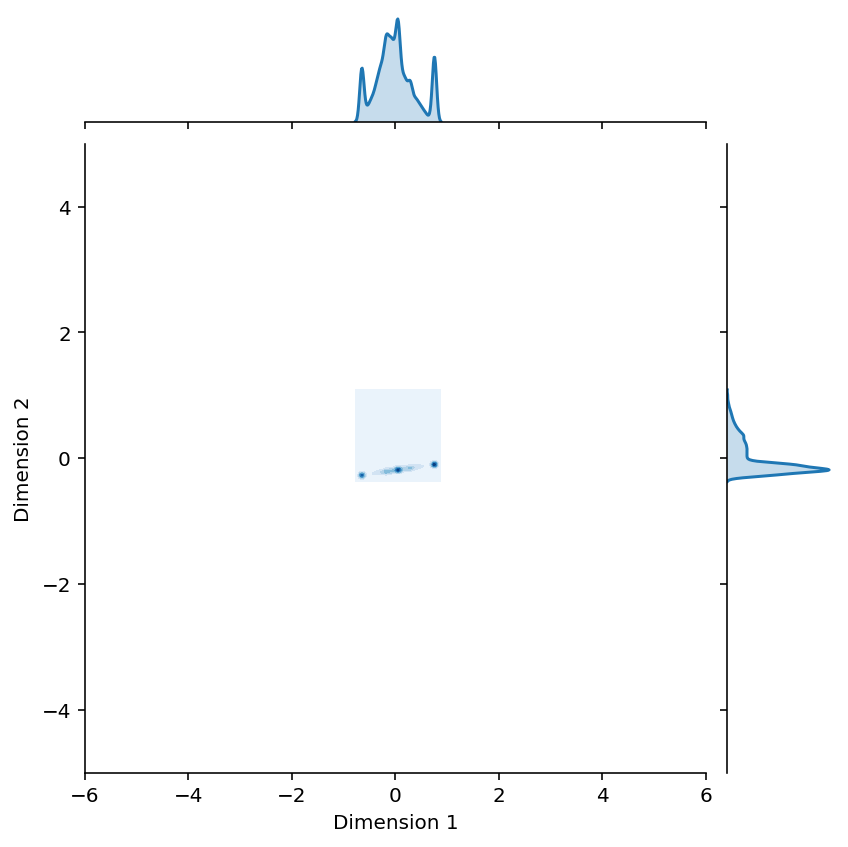

In [15]:
import seaborn as sns
g = sns.JointGrid("Dimension 1", "Dimension 2", reduced_data, xlim=(-6,6), ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

In [16]:
# 展示经过两个维度的PCA转换之后的样本log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.4053,-0.1432


In [17]:
# 可视化双标图
vs.biplot(data, reduced_data, pca)

In [18]:
# TODO：在降维后的数据上使用你选择的聚类算法
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=7, random_state=0).fit(reduced_data)
# TODO：预测每一个点的簇
preds = clusterer.predict(reduced_data)

# TODO：找到聚类中心
centers = clusterer.cluster_centers_

# TODO：预测在每一个转换后的样本点的类
sample_preds = clusterer.predict(centers)

# TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
from sklearn import metrics
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_data, preds)
score

0.49117029189215183

In [66]:
cluster_labels=clusterer.labels_ # get cluster label of all data


#get indexes of points in each cluster 
#Note: you can use these indexes in both data and data2
index_cluster_0=len(np.where(cluster_labels==0)[0]) # get indexes of points in cluster 0 
print("indexes of points in cluster 0:", index_cluster_0)
index_cluster_1=len(np.where(cluster_labels==1)[0]) # get indexes of points in cluster 1
print("indexes of points in cluster 1:", index_cluster_1)
index_cluster_2=len(np.where(cluster_labels==2)[0]) # get indexes of points in cluster 2
print("indexes of points in cluster 2:", index_cluster_2)
index_cluster_3=len(np.where(cluster_labels==3)[0]) # get indexes of points in cluster 3
print("indexes of points in cluster 3:", index_cluster_3)
index_cluster_4=len(np.where(cluster_labels==4)[0]) # get indexes of points in cluster 2
print("indexes of points in cluster 4:", index_cluster_4)
index_cluster_5=len(np.where(cluster_labels==5)[0]) # get indexes of points in cluster 2
print("indexes of points in cluster 5:", index_cluster_5)
index_cluster_6=len(np.where(cluster_labels==6)[0]) # get indexes of points in cluster 2
print("indexes of points in cluster 6:", index_cluster_6)

indexes of points in cluster 0: 5502
indexes of points in cluster 1: 5248
indexes of points in cluster 2: 9235
indexes of points in cluster 3: 3943
indexes of points in cluster 4: 4083
indexes of points in cluster 5: 4980
indexes of points in cluster 6: 7009


In [69]:
#Note: you can use these indexes in both data and data2
index_cluster_0=np.where(cluster_labels==0)[0] # get indexes of points in cluster 0 
print("indexes of points in cluster 0:", index_cluster_0)
index_cluster_1=np.where(cluster_labels==1)[0] # get indexes of points in cluster 1
print("indexes of points in cluster 1:", index_cluster_1)
index_cluster_2=np.where(cluster_labels==2)[0] # get indexes of points in cluster 2
print("indexes of points in cluster 2:", index_cluster_2)
index_cluster_3=np.where(cluster_labels==3)[0] # get indexes of points in cluster 3
print("indexes of points in cluster 3:", index_cluster_3)
index_cluster_4=np.where(cluster_labels==4)[0] # get indexes of points in cluster 2
print("indexes of points in cluster 4:", index_cluster_4)
index_cluster_5=np.where(cluster_labels==5)[0] # get indexes of points in cluster 2
print("indexes of points in cluster 5:", index_cluster_5)
index_cluster_6=np.where(cluster_labels==6)[0] # get indexes of points in cluster 2
print("indexes of points in cluster 6:", index_cluster_6)

indexes of points in cluster 0: [   14    18    27 ... 39992 39996 39999]
indexes of points in cluster 1: [   15    16    20 ... 39981 39993 39994]
indexes of points in cluster 2: [    6     8     9 ... 39977 39986 39988]
indexes of points in cluster 3: [    1     2     4 ... 39945 39952 39995]
indexes of points in cluster 4: [   11    21    22 ... 39944 39966 39998]
indexes of points in cluster 5: [   10    26    30 ... 39989 39991 39997]
indexes of points in cluster 6: [    0     3     5 ... 39983 39984 39990]


In [71]:
print("cluster labels of points:", cluster_labels)

cluster labels of points: [6 3 3 ... 5 4 0]


In [76]:
np.where(cluster_labels==4)[0]

array([   11,    21,    22, ..., 39944, 39966, 39998], dtype=int64)

In [81]:
data2 = np.array(data)
data2[0,0]

0.5555555560000001

In [86]:
data2

array([[0.55555556, 0.        , 0.        , 0.44444444, 0.        ],
       [0.16666667, 0.33333333, 0.33333333, 0.16666667, 0.        ],
       [0.22      , 0.3       , 0.34      , 0.12      , 0.02      ],
       ...,
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.        , 0.5       , 0.33333333, 0.        ],
       [0.        , 0.16666667, 0.16666667, 0.66666667, 0.        ]])

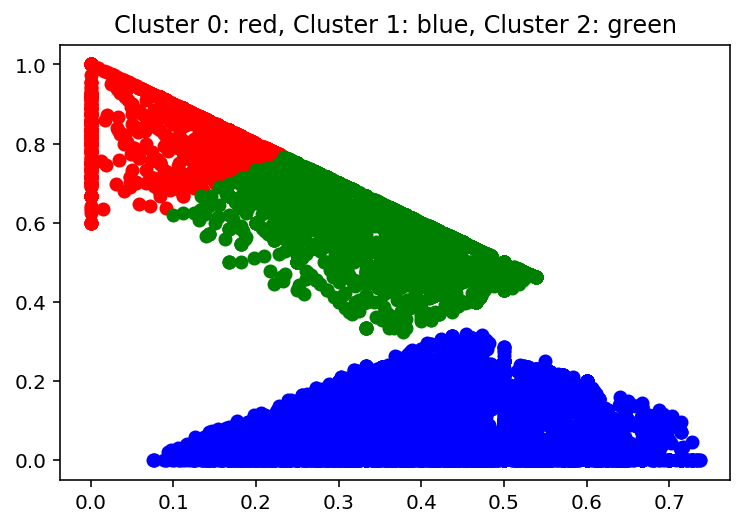

In [90]:
#plot the results
plt.plot(data2[index_cluster_0,0],data2[index_cluster_0,1],'ro') #samples in cluster 0 are red
plt.plot(data2[index_cluster_1,0],data2[index_cluster_1,1],'bo') #samples in cluster 1 are blue
plt.plot(data2[index_cluster_2,0],data2[index_cluster_2,1],'go') #samples in cluster 2 are green
plt.title('Cluster 0: red, Cluster 1: blue, Cluster 2: green')
plt.show()

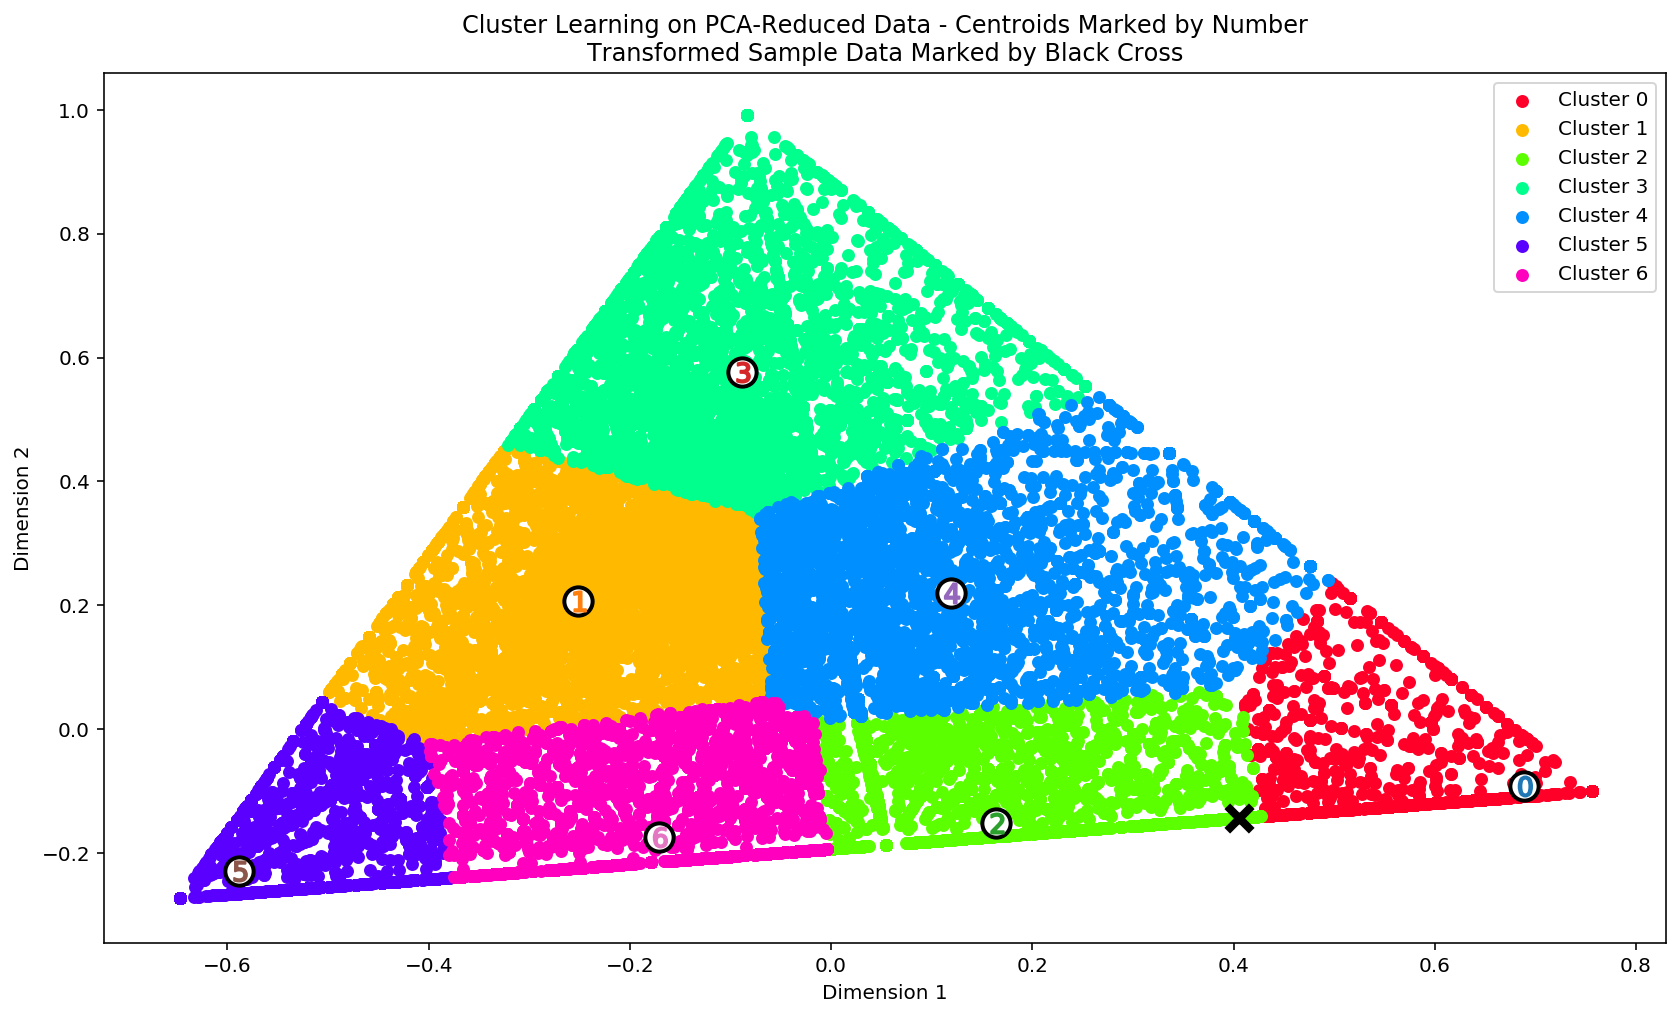

In [19]:
# 从已有的实现中展示聚类的结果
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [20]:
# TODO：反向转换中心点
log_centers = pca.inverse_transform(centers)

# TODO：对中心点做指数转换
true_centers = log_centers

# 显示真实的中心点
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(true_centers, columns = data.keys())
true_centers.index = segments
display(true_centers)

,f,redian,pu,remen,ch
Segment 0,0.036343,0.011142,0.005835,0.943337,0.003343
Segment 1,0.465677,0.089438,0.283906,0.105022,0.055957
Segment 2,0.404624,0.018075,0.003234,0.565254,0.008814
Segment 3,0.152088,0.144207,0.529023,0.083431,0.091252
Segment 4,0.222524,0.079825,0.265463,0.383159,0.049029
Segment 5,0.928509,0.029297,0.004982,0.019720,0.017492
Segment 6,0.631586,0.025027,0.012359,0.317078,0.013950


In [21]:
true_centers.to_csv('低频次聚类~7类.csv')

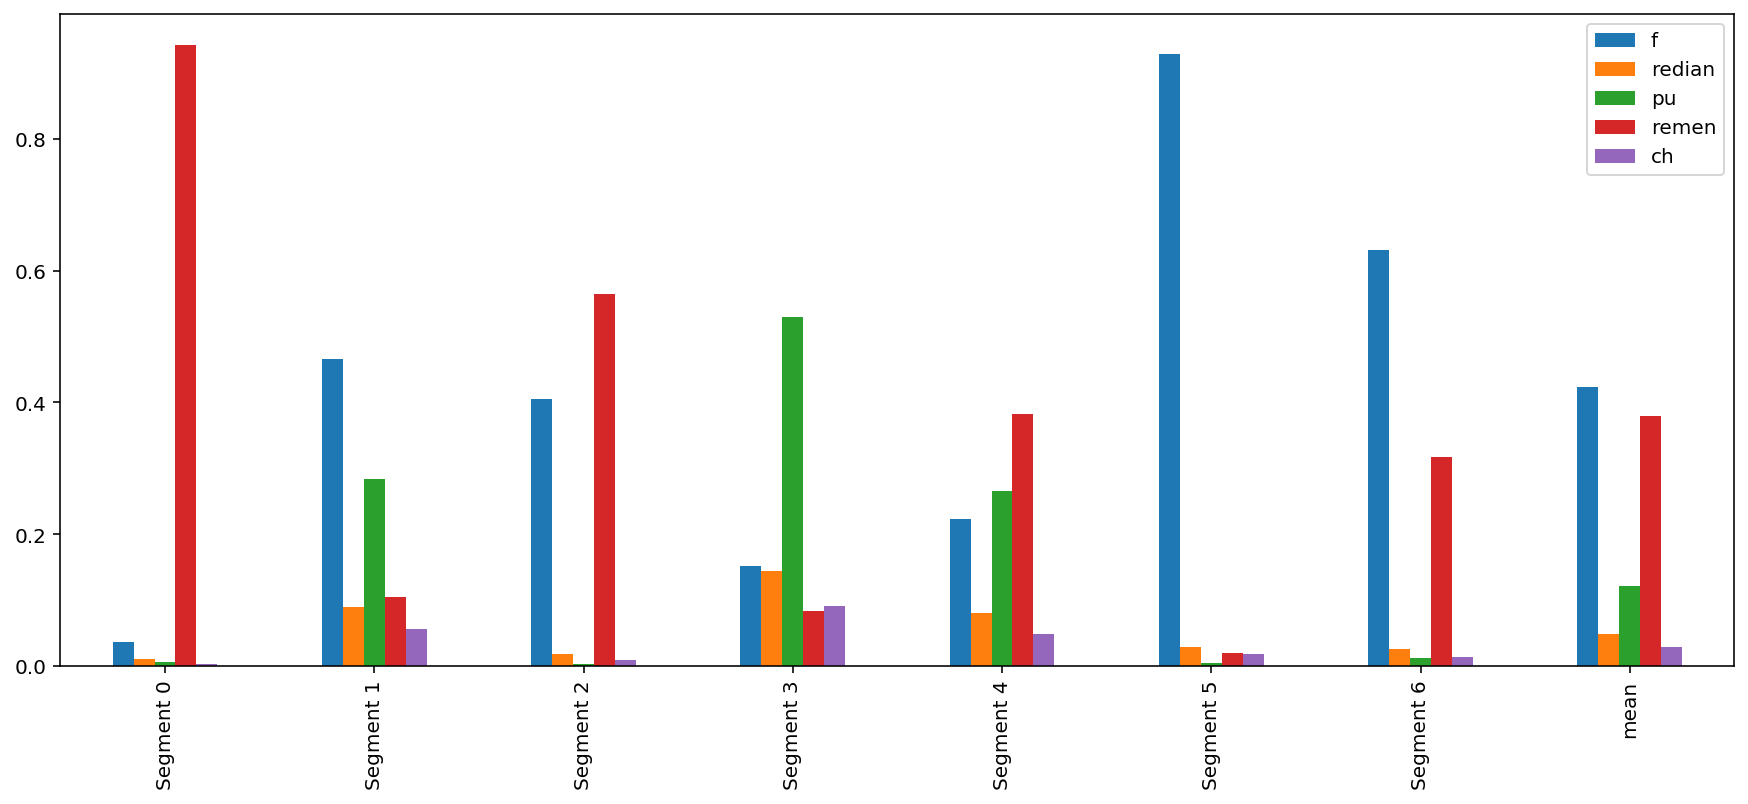

In [22]:
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

In [23]:
# 显示预测结果
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2
Sample point 3 predicted to be in Cluster 3
Sample point 4 predicted to be in Cluster 4
Sample point 5 predicted to be in Cluster 5
Sample point 6 predicted to be in Cluster 6
